# 第三章：Monte-Carlo随机采样方法

*Dreisteine, 2021.07.28*

---

## 一、问题提出

根据样本对统计模型参数进行**后验估计**：

$$
\begin{aligned}
    & {\rm Pr}\left(\theta_1 > \theta_2 | y_{1,1},...,y_{n_1,1},y_{2,1},...,y_{n_2, 1}\right) \\
    & = \int_{0}^{\infty} \int_{0}^{\theta_1} p\left(\theta_1, \theta_2 | y_{1,1},...,y_{n_1,1},y_{2,1},...,y_{n_2, 1} \right) d \theta_2 d\theta_1 \\
\end{aligned}
$$

对于上述式子，既可以直接通过微积分求解，也可以通过数值求解算法包求解。但是，这些方法严重依赖于具体的先验分布、模型细节和后验概率表述，**通用性差**。因此，我们将使用Monte-Carlo随机采样方法进行计算，该方法不依赖具体微积分和数值分析知识。

## 二、Monte-Carlo采样方法

假定我们能够根据参数$\theta$的后验分布（已知），随机独立地采集$S$个参数值样本：

$$
\theta^{(1)}, ..., \theta^{(S)} \sim \text{i.i.d. } p\left(\theta | y_{1},...,y_{n} \right)
$$

那么样本$\left\{ \theta^{(1)}, ..., \theta^{(S)} \right\}$的经验分布将随着$S$的增加而趋近于$p\left(\theta | y_{1},...,y_{n} \right)$,即为Monte-Carlo近似。

根据**大数定律**，令$g(\theta)$为任意形式的函数，若样本$\theta^{(1)}, ..., \theta^{(S)} \sim \text{i.i.d. } p\left(\theta | y_{1},...,y_{n} \right)$，则有：

$$
\frac{1}{S}\sum_{s=1}^{S}g(\theta^{(s)}) \rightarrow {\rm E}[g(\theta)]=\int g(\theta) p\left(\theta | y_{1},...,y_{n} \right)d\theta \text{ as } S \rightarrow \infty
$$

那么有：
* 样本均值收敛：$\bar \theta = \sum_{s=1}^{S}g(\theta^{(s)})/S \rightarrow {\rm E}[\theta | y_1, ..., y_n]$
* 样本方差收敛至${\rm Var}[\theta | y_1, ..., y_n]$
* 概率收敛
* 样本$\{\theta^{(1)},...,\theta^{(S)}\}$的经验分布 $\rightarrow p(\theta | y_1, ..., y_n)$
* 中位数收敛
* 分位数收敛

一句话概括：根据分布规则进行一系列采样，当样本量$S$充分大，样本集的统计性质将收敛于对应的分布

### <u>算例1：gamma分布参数估计</u>

> 首先，设定gamma分布并进行采样：

In [18]:
# Gamma分布的参数.
a <- 2; b <- 1
sm <- 66; n <- 44

# 按照不同样本量对Gamma分布进行采样.
theta_mc10 <- rgamma(10, a + sm, b + n)
theta_mc100 <- rgamma(100, a + sm, b + n)
theta_mc1000000 <- rgamma(1000000, a + sm, b + n)

> 比较不同样本量下样本均值与理论均值（=1.5）

In [16]:
mean(theta_mc10)
mean(theta_mc100)
mean(theta_mc1000000)

[1] 1.554231

[1] 1.543008

[1] 1.510915

> 从结果可见，随着样本量$S$的增加，样本均值逼近分布的均值。

## 三、对任意函数的后验推理

假设我们对某些可计算的函数$g(\theta)$的后验分布感兴趣，比如在二项分布模型中，我们对如下的对数几率更感兴趣：

$$
\log odds(\theta) = \log \frac{\theta}{1-\theta} =\gamma
$$

大数定律告诉我们，如果我们根据$\theta$的后验分布生成了一系列样本$\{\theta^{(1)}, \theta^{(2)}, ...\}$，那么：

$$
{\rm mean} \left(\log \frac{\theta^{(s)}}{1-\theta^{(s)}}\right) \rightarrow {\rm E}\left[\log \frac{\theta^{(s)}}{1-\theta^{(s)}} | y_1, ..., y_n\right]
$$

而我们可能也对$\gamma$的其他后验分布性质感兴趣，这样一来可以通过Monte-Carlo方法进行如下独立并行采样计算：

$$
\left.
 \begin{array}{cc}
 \text{sample } \theta^{(1)} \sim p(\theta | y_1,...,y_n), \text{compute } \gamma^{(1)}=g\left(\theta^{(1)}\right) \\
 \text{sample } \theta^{(2)} \sim p(\theta | y_1,...,y_n), \text{compute } \gamma^{(2)}=g\left(\theta^{(1)}\right) \\
 \vdots \\
 \text{sample } \theta^{(S)} \sim p(\theta | y_1,...,y_n), \text{compute } \gamma^{(S)}=g\left(\theta^{(1)}\right) \\
 \end{array}
\right\} \text{independently}
$$

当采样数$S \rightarrow \infty$，对于$\gamma$有：
* 均值收敛
* 方差收敛
* 分布收敛

### <u>算例2：Functions of Two Parameters</u>

> 基于Chapter 3中的出生率Birthrate案例，两个教育水平群体的后验分布为：
> $$
\begin{array}{cc}
    & \{\theta_1|y_{1,1}, ..., y_{n_1, 1}\} \sim {\rm gamma}(219, 112) \text{ (women without bachelor's degrees)} \\
    & \{\theta_2|y_{1,2}, ..., y_{n_2, 2}\} \sim {\rm gamma}(68, 45) \text{ (women with bachelor's degrees)} \\
\end{array}
$$

> 对于此例，我们对概率${\rm Pr}(\theta_1 > \theta_2|Y_{1,1}=y_{1,1},...,Y_{n_2,2}=y_{n_2,2})$或$\theta_1/\theta_2$的分布感兴趣，可以通过Monte-Carlo方法来实现:
> 
> $$
\begin{aligned}
&\text{sample } \theta_1^{(1)} \sim p(\theta_1|\sum_i Y_{i, 1}=217), \text{ sample }\theta_2^{(1)} \sim p(\theta_2|\sum_i Y_{i, 2}=66)\\
&\text{sample } \theta_1^{(2)} \sim p(\theta_1|\sum_i Y_{i, 1}=217), \text{ sample }\theta_2^{(2)} \sim p(\theta_2|\sum_i Y_{i, 2}=66)\\
&\vdots \\
&\text{sample } \theta_1^{(S)} \sim p(\theta_1|\sum_i Y_{i, 1}=217), \text{ sample }\theta_2^{(S)} \sim p(\theta_2|\sum_i Y_{i, 2}=66)\\
\end{aligned}
$$

> 在Chapter 3中已经提到了对于beta分布$\sum_{i}Y_i$是$\theta$的充分统计量。这样通过Monte-Carlo采样我们便获得了一系列的包含了$S$组$\theta_1$和$\theta_2$后验分布样本的采样序列$\left\{(\theta_1^{(1)}, \theta_2^{(1)}),...,(\theta_1^{(S)}, \theta_2^{(S)})\right\}$，然后计算${\rm Pr}\left(\theta_1 > \theta_2|\sum_{i=1}^{111}Y_{i,1}=217, \sum_{j=1}^{44}Y_{j,2}=66\right)$：
> 
> $$
{\rm Pr}\left(\theta_1 > \theta_2|\sum_{i=1}^{111}Y_{i,1}=217, \sum_{j=1}^{44}Y_{j,2}=66\right) \approx \frac{1}{S}\sum_{s=1}^{S}1(\theta_1 > \theta_2)
$$

> 对应的R代码如下：

In [8]:
# 分布参数.
a <- 2; b<- 1  # 先验参数
sm1 <- 217; n1 <- 111  # 后验参数
sm2 <- 66; n2 <- 44    # 后验参数

# 后验采样.
N_mc <- 10000
theta_1_mc <- rgamma(N_mc, a + sm1, b + n1)
theta_2_mc <- rgamma(N_mc, a + sm2, b + n2)

# 获得其他相关分布的概率.
mean(theta_1_mc > theta_2_mc)  # theta_1 > theta_2
mean(theta_1_mc / theta_2_mc)  # theta_1 / theta_2

[1] 0.9707

[1] 1.312313

## 四、从预测分布中采样

例如，令$\tilde{Y}$表示从有本科学位的妇女群体中某个体的小孩数量。如果已知该群体的出生率为$\theta$，我们可以使用$\theta$的Poisson分布来描述$\tilde{Y}$的不确定性，采样模型为：

$$
{\rm Pr}\left(\tilde Y = \tilde y | \theta \right) = p\big(\tilde y | \theta\big) = \theta^{\tilde y}e^{-\theta} / \tilde y !
$$

但是问题在于，**事实上我们无法知道$\theta$的真实值**，因此无法通过上式进行预测。

### 4.1 先验预测分布：

如果我们没有从人群中采集样本，我们对概率${\rm Pr}\left(\tilde Y = \tilde y \right)$的估计只能通过**全概率公式**对所有$\theta$对应分布进行PDF积分获得：

$$
{\rm Pr}\left(\tilde Y = \tilde y \right) = \int p\big(\tilde y|\theta \big)p(\theta) d\theta
$$

像这样不依赖观测数据，而是对未知分布参数全空间进行积分获得的分布为**先验预测分布(prior predictive distribution)**。该分布可用于评估先验假设是否与实际数据样本一致。

### 4.2 后验预测分布

当我们已经从人群中获得了一些关于$Y_1, ...,Y_n$的样本，对新的观测的预测分布变为：

$$
\begin{aligned}
{\rm Pr}\big(\tilde Y = \tilde y| Y_1=y_1,...,Y_n=y_n\big) &= \int p\big(\tilde y|\theta, y_1, ...,y_n\big)p\big(\theta|y_1,...,y_n\big) d\theta \\
\end{aligned}
$$

若已有的$Y_1=y_1,...,Y_n=y_n$的观测结果与未来新的观测无关，则有：

$$
p\big(\tilde y|\theta, y_1, ...,y_n\big) = p\big(\tilde y|\theta\big)
$$

那么

$$
\begin{aligned}
{\rm Pr}\big(\tilde Y = \tilde y| Y_1=y_1,...,Y_n=y_n\big) &= \int p\big(\tilde y|\theta\big)p\big(\theta|y_1,...,y_n\big) d\theta
\end{aligned}
$$

我们将此分布称为**后验预测分布(posterior predictive distribution)**。

### 4.3 后验预测分布Monte-Carlo采样

在许多建模场景中，我们可以方便地对$p(\theta | y_1,...,y_n)$和$p(y|\theta)$进行采样（参考chapter 3相关内容），但是对$p\big(\tilde y|y_1,...,y_n\big)$的采样可能会十分复杂，难以直接进行。在这种情况下，我们可以使用Monte-Carlo方法直接从后验预测分布中进行采样。由于$p\big(\tilde y|y_1,...,y_n\big)=\int p(\tilde y|\theta)p(\theta|y_1,...,y_n) d\theta$，可见$p\big(\tilde y|y_1,...,y_n\big)$是$p\big(\tilde y|\theta\big)$的后验期望，这样一来，便可设计如下的Monte-Carlo采样流程：

$$
\begin{aligned}
&\text{sample } \theta^{(1)} \sim p(\theta|y_1,...,y_n), \text{ sample } \tilde y^{(1)} \sim p\big(\tilde y|\theta^{(1)}\big) \\
&\text{sample } \theta^{(2)} \sim p(\theta|y_1,...,y_n), \text{ sample } \tilde y^{(2)} \sim p\big(\tilde y|\theta^{(2)}\big) \\
&\vdots \\
&\text{sample } \theta^{(S)} \sim p(\theta|y_1,...,y_n), \text{ sample } \tilde y^{(S)} \sim p\big(\tilde y|\theta^{(S)}\big) \\
\end{aligned}
$$

最终获得的序列$\{(\theta, y)^{(1)},...,(\theta, y)^{(S)}\}$便构成了$(\theta, \tilde Y)$的联合后验分布样本，其中$\{\tilde y^{(1)},...,\tilde y^{(S)}\}$便是符合后验分布的采样样本。

### <u>算例3：Poisson Model</u>

> 继续以chapter 3中的不同受教育水平妇女群体的子女数分布问题为例，为了计算未受教育妇女子女数大于受教育妇女子女数，我们可以进行以下二重求和：
>
> $$
{\rm Pr}\big(\tilde Y_1 > \tilde Y_2 | \sum_i Y_{i,1}=217, \sum_j Y_{j,2}=66\big) = \sum_{\tilde y_2=0}^{\infty} \sum_{\tilde y_1=\tilde y_2 + 1}^{\infty} {\rm dnbinom}(\tilde y_1, 219, 112) \times {\rm dnbinom}(\tilde y_2, 68, 45)
$$
> 
> 事实上，该求解也可以通过Monte-Carlo采样完成。考虑到$\tilde Y_1$与$\tilde Y_2$相互独立，则有可根据上述采样流程首先对$\theta_i|y_{i,1},...,y_{i,n}$进行采样，然后对应地进行$\tilde y_i|\theta_i$采样，从而获得$\tilde Y_1$与$\tilde Y_2$的后验预测分布样本，最后计算相关概率。
> 
> R代码如下：

In [2]:
# 分布参数.
a <- 2; b <- 1  # 先验分布
sm1 <- 217; n1 <- 111  # Y_1的样本
sm2 <- 66; n2 <- 44  # Y_2的样本

# Step 1: 对\theta_1和\theta_2的后验预测分布进行采样.
N_mc <- 10000
theta_1_mc <- rgamma(N_mc, a + sm1, b + n1)
theta_2_mc <- rgamma(N_mc, a + sm2, b + n2)

# Step 2: 分别根据\theta_1和\theta_2的后验预测分布，对\tilde y_1和\tilde y_2的后验预测分布进行采样.
y_1_mc <- rpois(N_mc, theta_1_mc)
y_2_mc <- rpois(N_mc, theta_2_mc)

# Step 3: 根据采样结果计算概率.
mean(y_1_mc > y_2_mc)

[1] 0.4743

### 4.4 后验预测模型校验

我们对未受教育妇女子女的后验分布进行求解时发现，子女数$y=2$和$y=1$的后验分布结果对比与样本经验分布存在较大偏差甚至是矛盾。这种矛盾一般源自两点：样本数过少使得分布崎岖不平不稳定，或是使用Poisson分布作为先验假设是有误的。那么怎么来检查后验分布模型在哪方面出了问题呢?

令$t(y)$表示分布中$y=2$的样本数与$y=1$的样本数之比，对于观测数据$t({\boldsymbol y}_{\rm obs})=2$。接下来我们便继续从另外**相同数量**的妇女群体中采集同样规模的样本$\boldsymbol{\tilde y}$，并尝试计算$t(\boldsymbol{\tilde y})$。样本数量的相同排除了观测样本数对后验结果的影响，因此只剩下对先验假设的检验：

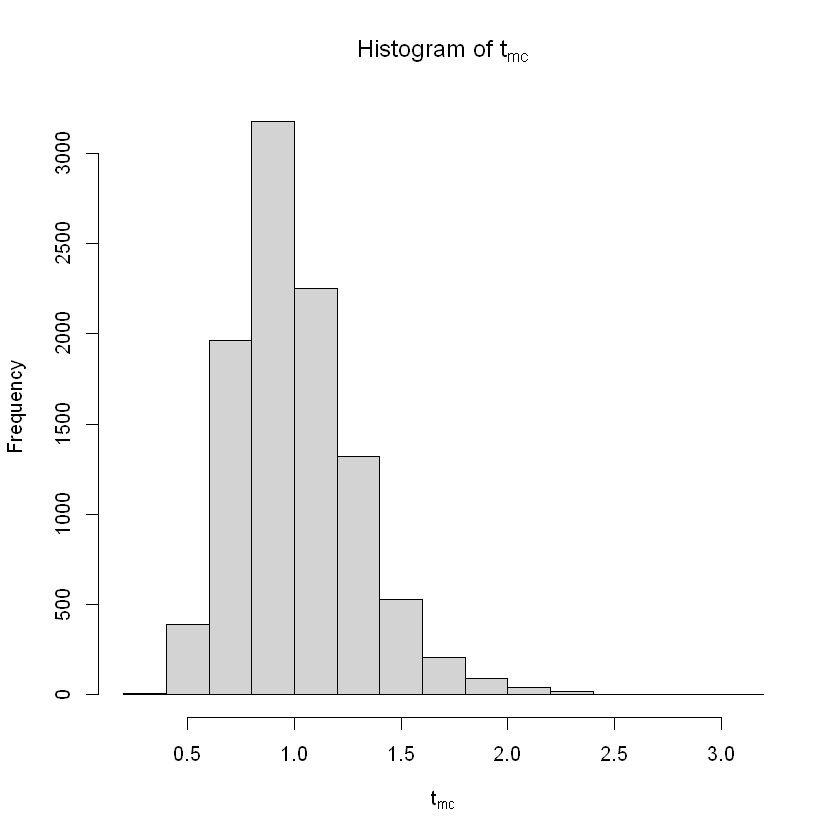

In [16]:
library(latex2exp)

a <- 2; b <- 1
sm1 <- 217; n1 <- 111 
t_mc <- NULL

for (s in 1:10000) {
    theta_1 <- rgamma(1, a + sm1, b + n1)
    y1_mc <- rpois(n1, theta_1)
    t_mc <- c(t_mc, sum(y1_mc == 2) / sum(y1_mc == 1))
}

hist(t_mc, xlab=TeX("$t_{mc}$"), main=TeX("Histogram of $t_{mc}$"))

从上图可以看出，使用Monte-Carlo进行了充分采样($N=10000$)，计算所得的$t(\boldsymbol{\tilde y})$分布均值在1附近，而实际样本中$t({\boldsymbol y}_{\rm obs})=2$，存在较大偏差。而每次采样都是$N=111$，这种偏差说明了采用Poisson分布作为先验假设是存在不足的，需要进行改进。